# Trabalhando com a análise de dados mundiais

In [2]:
import pandas as pd

In [17]:
data = pd.read_csv('./datasets/Gapminder.csv', delimiter=';')

In [18]:
data

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
...,...,...,...,...,...,...
3307,Zimbabwe,Africa,1987,62.351,9216418,706.157306
3308,Zimbabwe,Africa,1992,60.377,10704340,693.420786
3309,Zimbabwe,Africa,1997,46.809,11404948,792.449960
3310,Zimbabwe,Africa,2002,39.989,11926563,672.038623


In [19]:
data.columns = ['pais', 'continente', 'ano', 'expec_vida', 'populacao', 'pib']

In [20]:
data.head(3)

,pais,continente,ano,expec_vida,populacao,pib
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710


In [21]:
data.shape

(3312, 6)

In [22]:
data.dtypes

pais           object
continente     object
ano             int64
expec_vida    float64
populacao       int64
pib           float64
dtype: object

In [23]:
data.continente.unique()

array(['Asia', 'Europe', 'Africa', 'Americas', nan, 'FSU', 'Oceania'],
      dtype=object)

In [24]:
data.isnull().sum()

pais            0
continente    301
ano             0
expec_vida      0
populacao       0
pib             0
dtype: int64

In [25]:
df = data.dropna(subset=['continente'])

In [27]:
df.isnull().sum()

pais          0
continente    0
ano           0
expec_vida    0
populacao     0
pib           0
dtype: int64

In [63]:
df.describe()

,ano,expec_vida,populacao,pib
count,3011.000000,3011.000000,3.011000e+03,3011.000000
mean,1980.026901,64.850083,3.394400e+07,11119.822519
std,16.995161,12.005040,1.088830e+08,11466.278494
min,1950.000000,23.599000,6.314900e+04,241.165876
25%,1966.000000,57.310000,3.083892e+06,2375.180240
50%,1982.000000,69.451000,7.727553e+06,7696.777725
75%,1995.000000,73.550000,2.074354e+07,16646.010060
max,2007.000000,82.670000,1.318683e+09,113523.132900


In [28]:
import plotly.express as px

In [46]:
fig = px.bar(df, x=df.continente.unique(), y=
df.pais.groupby(df.continente).nunique(), title = 'Quantidade de países por continente na pesquisa')
fig.show()

In [62]:
mean_expec = df.expec_vida.groupby(df.ano).mean()
fig = px.line(df, x=df.ano.sort_values().unique(), y=mean_expec, title='Expectativa de vida no mundo por ano')
fig.show()

In [66]:
mean_expec_pais = df.expec_vida.groupby(df.continente).mean()
fig = px.bar(df, x=df.continente.unique(), y=mean_expec_pais, title='Expectativa de vida média no mundo')
fig.show()

In [88]:
soma = df.populacao.groupby(df.ano).sum()
fig = px.line(df, x=df.ano.sort_values().unique(), y=soma, title='População mundial')
fig.show()

In [232]:
fig = px.bar(df, x=df.ano.sort_values().unique(), 
             y=df.populacao.groupby(df.ano).sum(), 
            color=df.expec_vida.groupby(df.ano).mean(), 
             height=400)
fig.show()

# Trabalhando com análise de planilhas do Excel

In [94]:
df1 = pd.read_excel('./datasets/Aracaju.xlsx')
df2 = pd.read_excel('./datasets/Fortaleza.xlsx')
df3 = pd.read_excel('./datasets/Natal.xlsx')
df4 = pd.read_excel('./datasets/Recife.xlsx')
df5 = pd.read_excel('./datasets/Salvador.xlsx')

In [95]:
dataset = pd.concat([df1,df2,df3,df4,df5])

In [97]:
dataset

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8
...,...,...,...,...,...
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1


In [99]:
dataset.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [100]:
dataset['LojaID'] = dataset['LojaID'].astype('object')

In [101]:
dataset.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [102]:
dataset.mean()

<ipython-input-102-e55bc0ed4499>:1: FutureWarning:

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.



Vendas     122.611801
LojaID    1074.844519
Qtde         3.261745
dtype: float64

In [105]:
dataset['receita'] = dataset['Vendas'].mul(dataset['Qtde'])

In [106]:
dataset.head()

,Cidade,Data,Vendas,LojaID,Qtde,receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [107]:
dataset['Receita/Vendas'] = dataset['receita'] / dataset['Vendas']

In [108]:
dataset.head()

,Cidade,Data,Vendas,LojaID,Qtde,receita,Receita/Vendas
0,Aracaju,2018-01-01,142.00,1520,1,142.00,1.0
1,Aracaju,2018-01-01,14.21,1522,6,85.26,6.0
2,Aracaju,2018-01-01,71.55,1520,1,71.55,1.0
3,Aracaju,2018-01-01,3.01,1521,7,21.07,7.0
4,Aracaju,2018-01-01,24.51,1522,8,196.08,8.0


In [109]:
dataset.receita.max()

3544.0

In [110]:
dataset.receita.min()

3.34

In [111]:
dataset.nlargest(3,'receita')

,Cidade,Data,Vendas,LojaID,Qtde,receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0


In [113]:
dataset.nsmallest(3,'receita')

,Cidade,Data,Vendas,LojaID,Qtde,receita,Receita/Vendas
118,Aracaju,2018-01-01,3.34,1522,1,3.34,1.0
65,Recife,2019-01-01,4.01,981,1,4.01,1.0
92,Natal,2019-01-02,4.57,1035,1,4.57,1.0


In [121]:
ci = dataset.Cidade.unique()
receita_ci = dataset.receita.groupby(dataset.Cidade).sum()
fig = px.bar(dataset, x=ci, y=
receita_ci, title = 'Receita por cidade brasileira',
            labels={'x':'Cidade', 'y':'Receita'}
            )
fig.show()

In [123]:
dataset.sort_values('receita', ascending = False).head(5)

,Cidade,Data,Vendas,LojaID,Qtde,receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
30,Natal,2018-10-02,856.0,853,4,3424.0,4.0
41,Natal,2018-05-20,835.0,852,4,3340.0,4.0


In [124]:
dataset['Data'] = dataset['Data'].astype('int64')

In [125]:
dataset.dtypes

Cidade             object
Data                int64
Vendas            float64
LojaID             object
Qtde                int64
receita           float64
Receita/Vendas    float64
dtype: object

In [127]:
dataset['Data'] = pd.to_datetime(dataset['Data'])

In [128]:
dataset.receita.groupby(dataset.Data.dt.year).sum()

Data
2018    118176.53
2019    228246.45
Name: receita, dtype: float64

In [129]:
dataset['Ano_Venda'] = dataset['Data'].dt.year

In [130]:
dataset.head(7)

,Cidade,Data,Vendas,LojaID,Qtde,receita,Receita/Vendas,Ano_Venda
0,Aracaju,2018-01-01,142.00,1520,1,142.00,1.0,2018
1,Aracaju,2018-01-01,14.21,1522,6,85.26,6.0,2018
2,Aracaju,2018-01-01,71.55,1520,1,71.55,1.0,2018
3,Aracaju,2018-01-01,3.01,1521,7,21.07,7.0,2018
4,Aracaju,2018-01-01,24.51,1522,8,196.08,8.0,2018
5,Aracaju,2018-01-01,156.20,1522,1,156.20,1.0,2018
6,Aracaju,2018-01-01,35.50,1522,2,71.00,2.0,2018


In [133]:
dataset['mes'], dataset['dia'] = (dataset['Data'].dt.month, dataset['Data'].dt.day)

In [134]:
dataset.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,receita,Receita/Vendas,Ano_Venda,mes,dia
163,Natal,2019-01-02,17.66,1036,3,52.98,3.0,2019,1,2
183,Salvador,2019-01-02,120.23,1037,2,240.46,2.0,2019,1,2
112,Recife,2019-03-02,133.59,982,1,133.59,1.0,2019,3,2
90,Fortaleza,2019-01-01,18.01,1005,2,36.02,2.0,2019,1,1
110,Aracaju,2018-01-01,38.15,1520,4,152.60,4.0,2018,1,1


In [135]:
dataset.Data.min()

Timestamp('2018-01-01 00:00:00')

In [136]:
dataset.Data.max()

Timestamp('2019-04-05 00:00:00')

In [137]:
dataset['diferenca_dias'] = dataset['Data'] - dataset['Data'].min()

In [138]:
dataset.sample(3)

,Cidade,Data,Vendas,LojaID,Qtde,receita,Receita/Vendas,Ano_Venda,mes,dia,diferenca_dias
53,Salvador,2019-01-01,39.50,1035,3,118.50,3.0,2019,1,1,365 days
21,Natal,2019-02-08,679.00,853,2,1358.00,2.0,2019,2,8,403 days
22,Salvador,2019-01-01,32.57,1035,1,32.57,1.0,2019,1,1,365 days


In [139]:
dataset['trimestre'] = dataset['Data'].dt.quarter

In [140]:
dataset.sample(2)

,Cidade,Data,Vendas,LojaID,Qtde,receita,Receita/Vendas,Ano_Venda,mes,dia,diferenca_dias,trimestre
29,Fortaleza,2019-01-01,186.29,1005,2,372.58,2.0,2019,1,1,365 days,1
162,Salvador,2019-01-02,23.08,1036,2,46.16,2.0,2019,1,2,366 days,1


In [144]:
#Filtrando as vendas de 2019 do mês de março
vendas_mar_2019 = dataset.loc[(dataset['Data'].dt.year == 2019)&(dataset['Data'].dt.month == 3)]
vendas_mar_2019

,Cidade,Data,Vendas,LojaID,Qtde,receita,Receita/Vendas,Ano_Venda,mes,dia,diferenca_dias,trimestre
108,Fortaleza,2019-03-02,152.89,981,4,611.56,4.0,2019,3,2,425 days,1
109,Fortaleza,2019-03-02,18.90,982,6,113.40,6.0,2019,3,2,425 days,1
110,Fortaleza,2019-03-02,51.98,983,6,311.88,6.0,2019,3,2,425 days,1
111,Fortaleza,2019-03-02,8.00,981,3,24.00,3.0,2019,3,2,425 days,1
112,Fortaleza,2019-03-02,133.59,982,1,133.59,1.0,2019,3,2,425 days,1
...,...,...,...,...,...,...,...,...,...,...,...,...
137,Salvador,2019-03-02,51.66,1036,3,154.98,3.0,2019,3,2,425 days,1
138,Salvador,2019-03-02,212.03,1037,3,636.09,3.0,2019,3,2,425 days,1
139,Salvador,2019-03-02,169.01,1036,1,169.01,1.0,2019,3,2,425 days,1
140,Salvador,2019-03-02,20.79,1036,2,41.58,2.0,2019,3,2,425 days,1


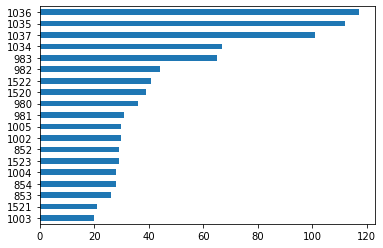

In [148]:
dataset['LojaID'].value_counts(ascending=True).plot(kind='barh');

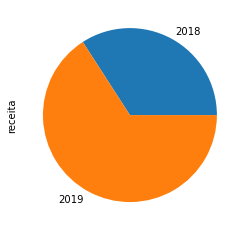

In [149]:
dataset.receita.groupby(dataset['Data'].dt.year).sum().plot(kind='pie')

In [151]:
dataset.Cidade.value_counts()

Salvador     240
Natal        240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

In [152]:
import matplotlib.pyplot as plt

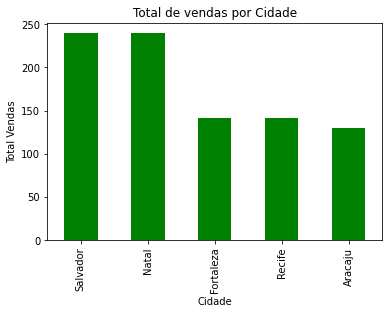

In [156]:
dataset['Cidade'].value_counts().plot.bar(title = 'Total de vendas por Cidade', color = 'green')
plt.xlabel('Cidade')
plt.ylabel('Total Vendas');

In [157]:
plt.style.use('ggplot')

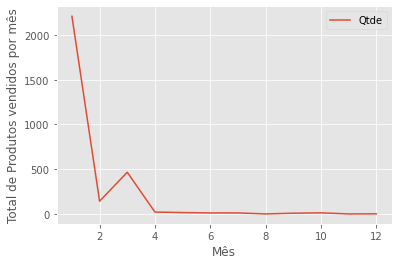

In [158]:
dataset.Qtde.groupby(dataset.mes).sum().plot()
plt.xlabel('Mês')
plt.ylabel('Total de Produtos vendidos por mês')
plt.legend();

In [159]:
dataset.Qtde.groupby(dataset.mes).sum()

mes
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [160]:
df_2019 = dataset[dataset.Ano_Venda == 2019]

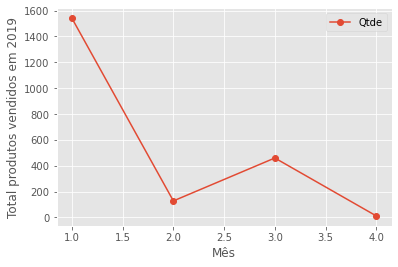

In [167]:
df_2019.Qtde.groupby(df_2019.mes).sum().plot(marker = 'o')
plt.xlabel('Mês')
plt.ylabel('Total produtos vendidos em 2019')
plt.legend();

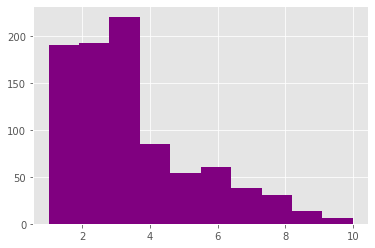

In [169]:
plt.hist(dataset.Qtde, color='purple');

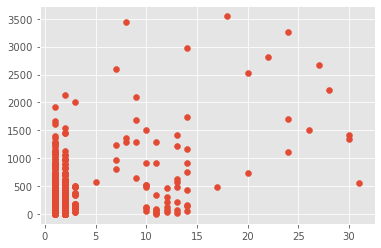

In [171]:
plt.scatter(x=df_2019['dia'], y = df_2019.receita);

# Análise exploratória de vendas

In [172]:
plt.style.use('seaborn')

In [174]:
d = pd.read_excel('./datasets/AdventureWorks.xlsx')

In [175]:
d.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red


In [177]:
d.dtypes

Data Venda        datetime64[ns]
Data Envio        datetime64[ns]
ID Loja                    int64
ID Produto                 int64
ID Cliente                 int64
No. Venda                 object
Custo Unitário           float64
Preço Unitário           float64
Quantidade                 int64
Valor Desconto           float64
Valor Venda              float64
Produto                   object
Fabricante                object
Marca                     object
Classe                    object
Cor                       object
dtype: object

In [178]:
d.isnull().sum()

Data Venda        0
Data Envio        0
ID Loja           0
ID Produto        0
ID Cliente        0
No. Venda         0
Custo Unitário    0
Preço Unitário    0
Quantidade        0
Valor Desconto    0
Valor Venda       0
Produto           0
Fabricante        0
Marca             0
Classe            0
Cor               0
dtype: int64

In [179]:
#Receita total
d['Valor Venda'].sum()

5984606.1426

In [180]:
#Custo total
d['custo'] = d['Custo Unitário'].mul(d['Quantidade'])

In [182]:
d.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48


In [183]:
d['custo'].sum()

2486783.05

In [185]:
d['lucro'] = d['Valor Venda'] - d['custo']

In [186]:
d.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo,lucro
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52


In [188]:
round(d['lucro'].sum(),2)

3497823.09

In [189]:
d['entrega'] = d['Data Envio'] - d['Data Venda']

In [191]:
d.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo,lucro,entrega
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,20 days


In [192]:
d['entrega'] = (d['Data Envio'] - d['Data Venda']).dt.days

In [193]:
d.entrega.dtype

dtype('int64')

In [195]:
d.entrega.groupby(d.Marca).mean()

Marca
Adventure Works    8.663866
Contoso            8.470930
Fabrikam           8.510121
Name: entrega, dtype: float64

In [200]:
#lucro por ano e marca
pd.options.display.float_format = '{:20,.2f}'.format
d.lucro.groupby([d['Data Venda'].dt.year, d.Marca]).sum()

Data Venda  Marca          
2008        Adventure Works             306,641.16
            Contoso                      56,416.00
            Fabrikam                  1,557,020.55
2009        Adventure Works             405,395.08
            Contoso                     138,258.95
            Fabrikam                  1,034,091.35
Name: lucro, dtype: float64

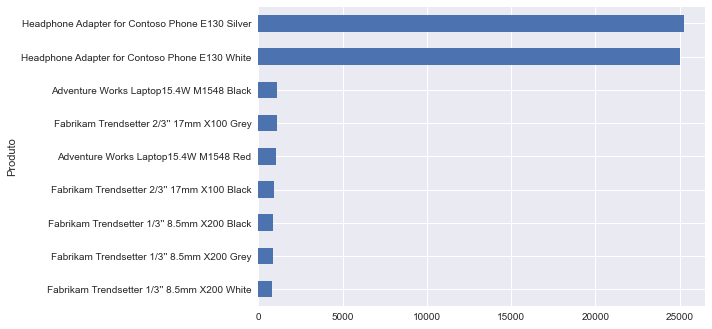

In [205]:
#Total de produtos vendidos
d.Quantidade.groupby(d.Produto).sum().sort_values().plot(kind='barh');

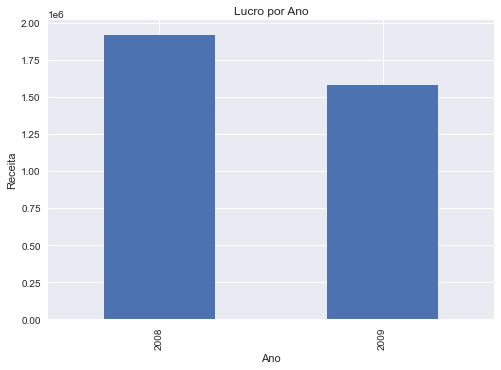

In [208]:
d.lucro.groupby(d['Data Venda'].dt.year).sum().plot(kind='bar', title = 'Lucro por Ano')
plt.xlabel('Ano')
plt.ylabel('Receita');

In [209]:
d_2009 = d[d['Data Venda'].dt.year == 2009]

In [210]:
d_2009.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo,lucro,entrega
11,2009-05-02,2009-05-14,199,384,18938,200905023CS847,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",12


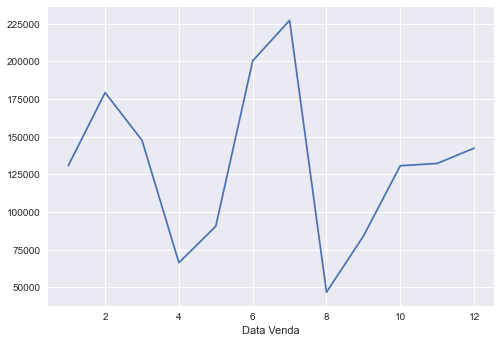

In [213]:
d_2009.lucro.groupby(d_2009['Data Venda'].dt.month).sum().plot();

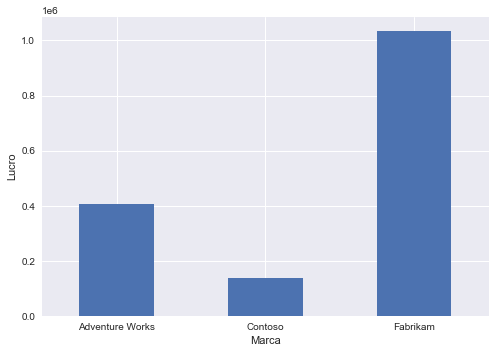

In [220]:
d_2009.lucro.groupby(d_2009.Marca).sum().plot(kind='bar')
plt.ylabel('Lucro')
plt.xlabel('Marca')
plt.xticks(rotation='horizontal');

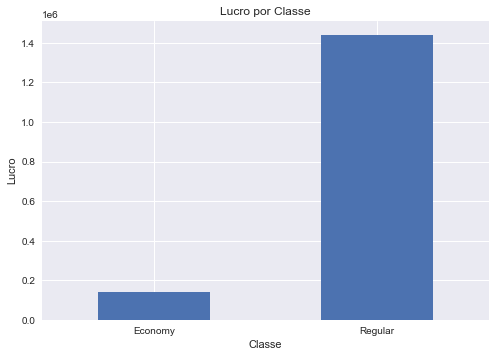

In [218]:
d_2009.lucro.groupby(d_2009.Classe).sum().plot(kind='bar', title='Lucro por Classe')
plt.xlabel('Classe')
plt.ylabel('Lucro')
plt.xticks(rotation='horizontal');

In [222]:
d.entrega.describe()

count                 904.00
mean                    8.54
std                     3.06
min                     4.00
25%                     6.00
50%                     9.00
75%                    11.00
max                    20.00
Name: entrega, dtype: float64

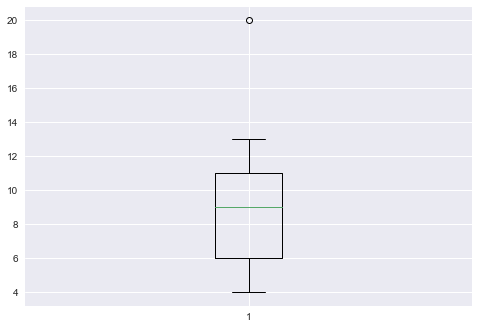

In [223]:
plt.boxplot(d['entrega']);

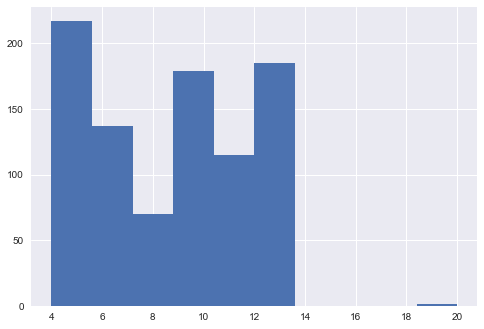

In [224]:
plt.hist(d.entrega);

In [229]:
print(d.entrega.min())
print(d.entrega.max())

4
20


In [230]:
d[d.entrega == 20]

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo,lucro,entrega
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",20
